In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [2]:
!ls ../../datasets/*.pickle

../../datasets/pandas_df_all.pickle


In [3]:
with open("../../datasets/pandas_df_all.pickle", "rb") as f:
    df_all = pickle.load(f)

In [28]:
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index()

1     527714
2      25302
3       3870
4       1204
5        540
6        336
7        259
8        176
9        135
10        60
11        44
12        96
13       143
14        70
15        90
16        80
17        85
18        54
19        95
20        20
21        42
22        88
23       138
24        72
28        56
29        87
30        90
31        93
35        35
39        39
41        82
Name: reverts_per_page_botpair_sorted, dtype: int64

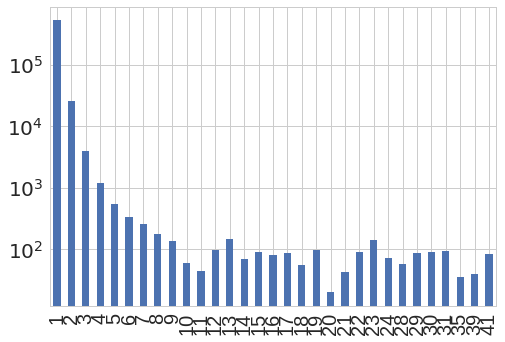

In [27]:
sns.set(font_scale=2, style="whitegrid")
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index().plot(kind='bar')

plt.yscale("log")

In [17]:
gb = df_all.query("reverts_per_page_botpair_sorted > 500").groupby(["language", "page_namespace", "rev_page", "botpair_sorted"])

In [18]:
gb['rev_id'].count()

language  page_namespace  rev_page  botpair_sorted                              
en        4               974956    ['AnomieBOT', 'Legobot']                          521
                          4626266   ['ClueBot NG', 'HBC AIV helperbot']              2047
                                    ['ClueBot NG', 'HBC AIV helperbot11']            2526
                                    ['ClueBot NG', 'HBC AIV helperbot5']             8527
                                    ['ClueBot NG', 'HBC AIV helperbot7']            10473
                                    ['ClueBot', 'HBC AIV helperbot2']                1002
                                    ['ClueBot', 'HBC AIV helperbot3']                5822
                                    ['ClueBot', 'HBC AIV helperbot4']                1545
                                    ['ClueBot', 'HBC AIV helperbot5']                3007
                                    ['ClueBot', 'HBC AIV helperbot7']                4110
                   

In [32]:
len(df_all.query("language == 'en' and rev_page == 4626266"))

54946

In [34]:
len(df_all.query("language == 'en' and rev_page == 11238105"))

18918

In [35]:
len(df_all.query("language == 'en' and rev_page == 5964327"))

3659

page_id	page_title
- 974956	Possibly_unfree_files
- 4626266	Administrator_intervention_against_vandalism/TB2
- 5964327	Suspected_copyright_violations
- 11005908	Tutorial/Editing/sandbox
- 11238105	Usernames_for_administrator_attention/Bot

In [38]:
df_all.query("language == 'en' and rev_page == 5971841").groupby("botpair")['time_to_revert_days'].median()

botpair
FrescoBot rv Mathbot    36.399456
Mathbot rv DrilBot       0.556840
Mathbot rv FrescoBot     0.670440
Mathbot rv Yobot         0.944352
Yobot rv Mathbot        12.057517
Name: time_to_revert_days, dtype: float64